# SNPs: Sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

# EFast

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-efast.csv")
t.shape

(6000, 3)

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

<ipython-input-4-28a1c4a50fc9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive    logistic   
1         10          1      8000       additive    logistic   
2        100          1      8000       additive    logistic   
3       1000          1      8000       additive    logistic   
4       1001          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.306359                        0.0        0.1         0.612718   
1            0.310859                        0.0        0.1         0.853718   
2            0.355859                        0.0        0.1         0.736282   
3            0.194141                        0.0        0.1         0.636282   
4            0.193641                        0.0        0.1         0.387282   

   p_fertility_factor  
0            0.183815  
1            0.267515  
2            0.095485  
3            0.125485  
4            0.116185

## Proportion obese

                              S1        ST   S1_conf   ST_conf
random-mating           0.108862  0.230304  0.004503  0.017754
genetic-variance        0.481297  0.684633  0.003860  0.020984
fertility-differential  0.189096  0.336583  0.003539  0.017737


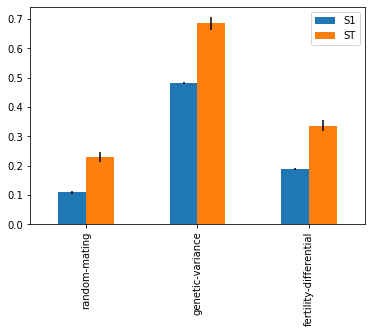

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'genes'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## Average BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.097207  0.184699  0.004070  0.019441
genetic-variance        0.506199  0.663692  0.003146  0.019900
fertility-differential  0.226997  0.350188  0.004281  0.018830


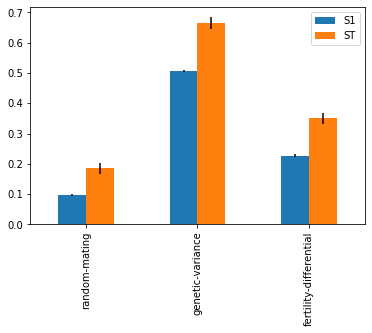

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav['ef_avg_s1'] = ef.tabval('S1')
sav['ef_avg_st'] = ef.tabval('ST')


## BMI SD

                              S1        ST   S1_conf   ST_conf
random-mating           0.148267  0.520969  0.004049  0.017706
genetic-variance        0.307910  0.720511  0.003658  0.019141
fertility-differential  0.077537  0.397177  0.004649  0.018847


['efast-snp.pkl']

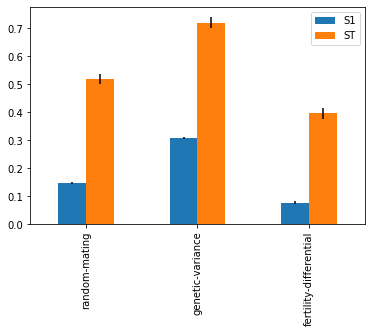

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-snp.pkl')


# Sobol

In [9]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-sobol.csv")
len(t)

16384

In [10]:
# read data
df = pd.read_csv(output_path + "results-snp-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]


(16384, 12)


<ipython-input-10-3290f5cf4f77>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [11]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive    logistic   
1         10          1      8000       additive    logistic   
2        100          1      8000       additive    logistic   
3       1000          1      8000       additive    logistic   
4      10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.156860                        0.0        0.1         0.000732   
1            0.406860                        0.0        0.1         0.246826   
2            0.188110                        0.0        0.1         0.313232   
3            0.210571                        0.0        0.1         0.864014   
4            0.114136                        0.0        0.1         0.158447   

   p_fertility_factor  
0            0.220239  
1            0.070239  
2            0.239429  
3            0.199585  
4            0.252466

## Proportion obese

                              ST   ST_conf
random-mating           0.231992  0.025629
genetic-variance        0.688248  0.055500
fertility-differential  0.329764  0.037317
                              S1   S1_conf
random-mating           0.111532  0.029863
genetic-variance        0.494108  0.053148
fertility-differential  0.187156  0.034571
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.075891  0.057624
(random-mating, fertility-differential)     0.020472  0.057405
(genetic-variance, fertility-differential)  0.088403  0.077264


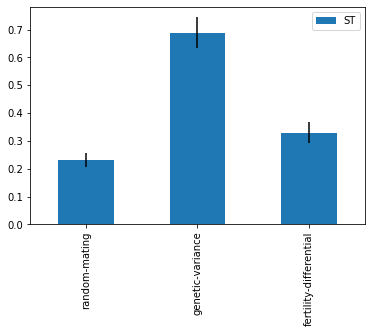

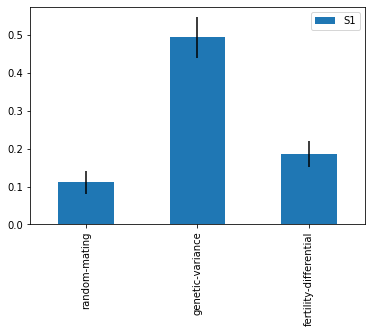

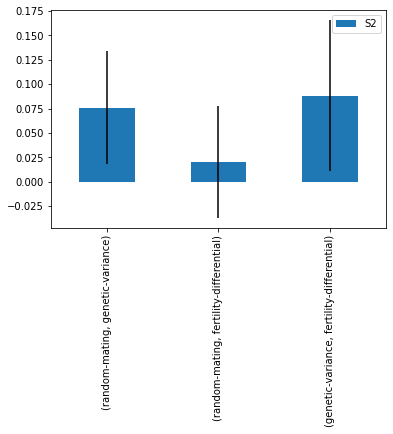

In [12]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}


## Average BMI

                              ST   ST_conf
random-mating           0.185404  0.018321
genetic-variance        0.667398  0.050398
fertility-differential  0.342869  0.030643
                              S1   S1_conf
random-mating           0.101796  0.026544
genetic-variance        0.520302  0.051712
fertility-differential  0.225340  0.031437
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.049966  0.053248
(random-mating, fertility-differential)     0.013582  0.047005
(genetic-variance, fertility-differential)  0.072619  0.074064


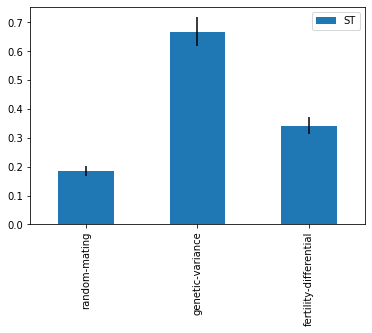

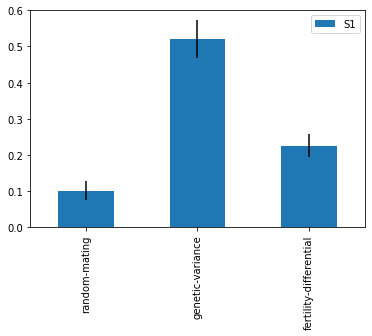

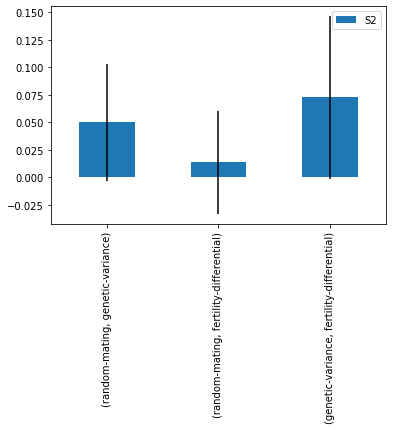

In [13]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## BMI SD

                              ST   ST_conf
random-mating           0.486759  0.063572
genetic-variance        0.762838  0.092667
fertility-differential  0.457948  0.077377
                              S1   S1_conf
random-mating           0.148938  0.055843
genetic-variance        0.324851  0.064297
fertility-differential  0.072106  0.040099
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.117613  0.108980
(random-mating, fertility-differential)     0.043751  0.114261
(genetic-variance, fertility-differential)  0.096580  0.119435


['sobol-snp.pkl']

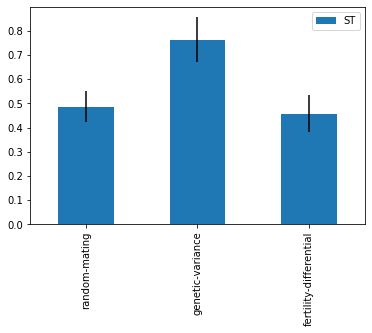

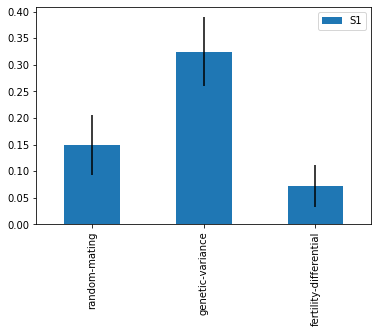

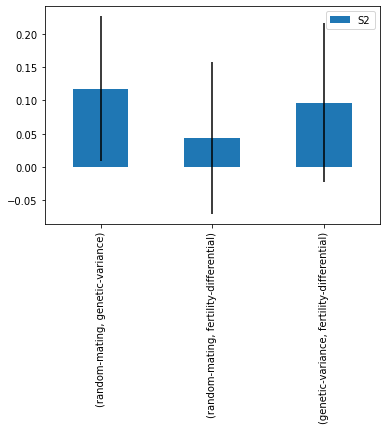

In [14]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')


# save output
v = sb.createRows(sav, g = ['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp.pkl')
